# Solution creater template 

This notebook assumes that https://co2020-ba-vu.challenges.ortec.com/zips/Validator.zip has been unpacked to a subdirectory of the current directory called `ParticipantsSuite`, changes to a different location are obvious. 

It also assumes a subdirectory `instances` containing the instance files. 

In [1]:
import sys
import os
import pandas as pd
sys.path.append('./ParticipantsSuite')

from InstanceCVRPTWUI import InstanceCVRPTWUI
instance = InstanceCVRPTWUI('instances/co2020_challenge_r100d10_1.txt')

In [2]:
if instance.isValid():
    instance.calculateDistances()
    import numpy
    nLoc = len(instance.Coordinates)
    d_df = pd.DataFrame([ [ instance.calcDistance[i][j] for j in range(nLoc) ] for i in range(nLoc) ])

t_df = pd.DataFrame([(i.ID, i.weight, i.amount, i.cost) for i in instance.Tools], columns=['ID','weight','amount','cost']).set_index('ID')
r_df = pd.DataFrame([(i.ID, i.node, i.fromDay, i.toDay, i.numDays, i.tool, i.toolCount) for i in instance.Requests], columns=['ID','node','fromDay','toDay','numDays','tool','toolCount']).set_index('ID')
c_df = pd.DataFrame([(i.ID, i.X, i.Y) for i in instance.Coordinates], columns=['ID','X','Y']).set_index('ID')

## List of DataFrames with data:

Tools: `t_df`, Requests: `r_df`, Coordinates: `c_df`, Distances: `d_df`

In [3]:

# Solution.
r_df_m = r_df.merge(c_df, left_on='node', right_index=True)
r_df_m = r_df_m.merge(t_df, left_on='tool', right_index=True)
r_df_m['size'] = r_df_m.toolCount * r_df_m.weight
r_df_pickupDay = r_df_m.copy()
r_df_fromDay = r_df_m.copy()

r_df_pickupDay['pickupDay'] = r_df_pickupDay.fromDay + r_df_pickupDay.numDays
r_df_fromDay.drop(columns=['toDay','numDays'], axis=1, inplace=True)
r_df_pickupDay.drop(columns=['fromDay','toDay','numDays'], axis=1, inplace=True)

r_df_fromDay_d1 = r_df_fromDay[r_df_fromDay['fromDay']==1]
r_df_fromDay_d1


,node,fromDay,tool,toolCount,X,Y,weight,amount,cost,size
ID,,,,,,,,,,
13,48,1,4,3,7397,7981,15,28,50000000,45
18,43,1,4,3,4867,3186,15,28,50000000,45
36,27,1,4,3,9131,6013,15,28,50000000,45
47,83,1,4,3,3794,5082,15,28,50000000,45
58,3,1,1,1,8109,6259,9,30,40000000,9
59,94,1,1,3,7398,5577,9,30,40000000,27
82,34,1,1,3,7017,9519,9,30,40000000,27
7,93,1,5,3,3818,5489,9,24,30000000,27
15,38,1,5,2,8354,4859,9,24,30000000,18


In [4]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(c_df.iloc[0:1].X, c_df.iloc[0:1].Y, color='r')
ax.scatter(r_df_fromDay_d1.X, r_df_fromDay_d1.Y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
# mees = r_df_fromDay[r_df_fromDay['fromDay']==(1)].set_index('node').drop(columns=['fromDay','tool','toolCount'])
# for k, v in mees.iterrows():
#         print(ax.annotate(k, v))
        


ValueError: too many values to unpack (expected 2)

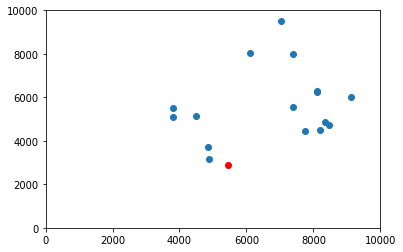

In [6]:
for i in range(r_df_fromDay['fromDay'].max()):
    delivery = r_df_fromDay[r_df_fromDay['fromDay']==(i+1)]
    fig=plt.figure()
    ax=fig.subplots()
    ax.scatter(c_df[c_df.index==0].X, c_df[c_df.index==0].Y, color='r')
    ax.scatter(delivery.X, delivery.Y)
    ax.set_ylim((0,10000))
    ax.set_xlim((0,10000))
    a = delivery.set_index('node')
    a = a.drop(columns=['fromDay','tool','toolCount'])
    for k, v in a.iterrows():
        ax.annotate(k, v)
    plt.show()
   